In [1]:
import os
import PyPDF2
import fitz

In [2]:
dir = 'annoted_sustainability_reports/Utilities'

In [3]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)
    
    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:
        
        highlights = []
        annot = page.first_annot
        while annot: 
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try: 
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else: 
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0,len(all_coordinates),4)]
                        for i in range(0, len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
    s = ""

    for r in result:
        if r is not None:
            s += r

    # Create array of highlighted sentences in the pdf
    highlighted_sentences = s.split('.')

    print(highlighted_sentences, "\n", len(highlighted_sentences))
    
    rel_text.append(highlighted_sentences)
    
    num_highlighted = len(highlighted_sentences)
    
    highlight_list.append(num_highlighted)

annoted_sustainability_reports/Utilities/Dominion_Energy_2021-climate-report.pdf
Document('annoted_sustainability_reports/Utilities/Dominion_Energy_2021-climate-report.pdf')
['Dominion Energy Consolidated Energy Mix (GWh) Renewable Build Scenario Dominion Energy Consolidated Energy Mix (GWh) Resource Constraints Scenario Dominion Energy Consolidated Energy Mix (GWh) Advanced Dispatchable Technology Scenario'] 
 1
annoted_sustainability_reports/Utilities/Duke_Energy_2021-esg-report-full.pdf
Document('annoted_sustainability_reports/Utilities/Duke_Energy_2021-esg-report-full.pdf')
['We are also expanding our renewable footprint and own, operate or purchased over 10 gigawatts (GW) of renewables (solar and wind) in 2021, targeting 24 GW by 2030', 'Since 2010, we’ve retired 56 coal units representing approximately 7,500 MW', ' Already, the company has reduced carbon emissions from electricity generation by 44% from 2005 levels – the equivalent of removing 13 million vehicles from the road', 

['Our carbon goal is to be emissions-free completely emissions-free by completely no later Our carbon later to be emissions-free 2045', ' goal is emissions-free than 2045', ' is to emissions-free 2045', ' be completely emissions-free Our completely by plan completely no plan includes completely carbon later includes emissions-free than meaningful emissions-free 2045', ' meaningful emissions-free Our milestones by no plan milestones later includes milestones in five- no later includes milestones than 2045', ' meaningful year increments than meaningful year Our plan milestones increments plan includes milestones increments that would includes in would includes five- would meaningful milestones increments to reach meaningful increments allow us to meaningful year allow milestones that reach Real milestones in would Real Zero in five- would Zero year increments that would allow us to reach Real emissions by no later than would Zero than 2045', ' allow us emissions NextEra reach Real later 

In [4]:
# Extracting all sentences from the file 
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir,file)
    print(f)
    
    pdfFileObj = open(f, 'rb')
    pdfReader  = PyPDF2.PdfFileReader(pdfFileObj)
    
    t = ""
    
    for count in range(len(fitz.open(f))):
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        
    pdfFileObj.close()
    total_sentences = t.split('.')
    print(len(total_sentences))
    
    all_text.append(total_sentences)
    
    num_sentences = len(total_sentences)
    
    sentences_list.append(num_sentences)

Xref table not zero-indexed. ID numbers for objects will be corrected.


annoted_sustainability_reports/Utilities/Dominion_Energy_2021-climate-report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


798
annoted_sustainability_reports/Utilities/Duke_Energy_2021-esg-report-full.pdf
1306
annoted_sustainability_reports/Utilities/AEP_2022_Sustainability-Report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1767
annoted_sustainability_reports/Utilities/NextEraEnergyZeroCarbonBlueprint.pdf
267


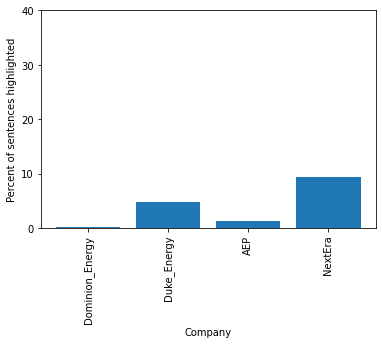

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Dominion_Energy", "Duke_Energy", "AEP","NextEra"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [12]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    4.000000
mean     3.884393
std      4.145854
min      0.125313
25%      1.007559
50%      3.024481
75%      5.901314
max      9.363296
dtype: float64

In [13]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

Utilities_reltext = rel_text
Utilities_alltext = all_text

%store Utilities_reltext
%store Utilities_alltext

Stored 'Utilities_reltext' (list)
Stored 'Utilities_alltext' (list)
